## HR Analytics Case Study
### Employee Attrition Analysis
#### Source: https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study

<b>Problem Statement</b><br>
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:<br>

<b>1)</b> The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners<br>
<b>2)</b> A sizeable department has to be maintained, for the purposes of recruiting new talent<br>
<b>3)</b> More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company<br>

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.<br>

Since you are one of the star analysts at the firm, this project has been given to you.<br>

<b>Goal of the case study</b><br>
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### Datasets' Info
<b>data_dictionary.xlsx </b> Meta data details about the data set<br>
<b>employee_survey_data.csv </b> This file contains Survey result<br>
<b>general_data.csv </b> This file contain general data about employees<br>
<b>in_time.csv </b> This file contains in time details of the employees<br>
<b>manager_survey_data.csv </b> This file contains employees feedback survey about their managers<br>
<b>out_time.csv </b> This file contains employees logout time details

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
general_data = pd.read_csv("general_data.csv")

In [5]:
general_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


#### Let's get into this data

In [6]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [7]:
print("Number of Duplicated Rows:",general_data.duplicated().sum())
print("Shape of the Data:",general_data.shape)
print("Number of Null Data:",sum(general_data.isnull().sum()))

Number of Duplicated Rows: 0
Shape of the Data: (4410, 24)
Number of Null Data: 28


In [8]:
pd.DataFrame([general_data.isnull().sum(),],index=["Number Of Null"])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Number Of Null,0,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,9,0,0,0,0


We need to deal with these null values

In [9]:
general_data["NumCompaniesWorked"].fillna(general_data["NumCompaniesWorked"].mean(), inplace=True)
general_data["TotalWorkingYears"].fillna(general_data["TotalWorkingYears"].mean(), inplace=True)

In [10]:
general_data.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           11
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            41
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

It seems "EmployeeCount" , "Over18" and "StandardHours" columns have just one-type value. So we can drop these.<br>
And also we can drop "EmployeeID" because it is unique and does not tell anything except for pointing his/her

In [11]:
new_general_data = general_data.drop(['EmployeeCount','Over18','EmployeeID','StandardHours'],axis=1)

Let's calculate the portion of Attrition and Non-Attrition Levels

In [12]:
print("Length of Data:",len(new_general_data))
print("Number of Attrition:",len(new_general_data[new_general_data['Attrition']=='Yes']))
print("Number of Not Attrition:",len(new_general_data[new_general_data['Attrition']=='No']))
print("Percentage of yes Attrition is:",(len(new_general_data[new_general_data['Attrition']=='Yes'])/len(new_general_data))*100,"%")
print("Percentage of no Attrition is:",(len(new_general_data[new_general_data['Attrition']=='No'])/len(new_general_data))*100,"%")

Length of Data: 4410
Number of Attrition: 711
Number of Not Attrition: 3699
Percentage of yes Attrition is: 16.122448979591837 %
Percentage of no Attrition is: 83.87755102040816 %


Time to show Correlations on Heatmap

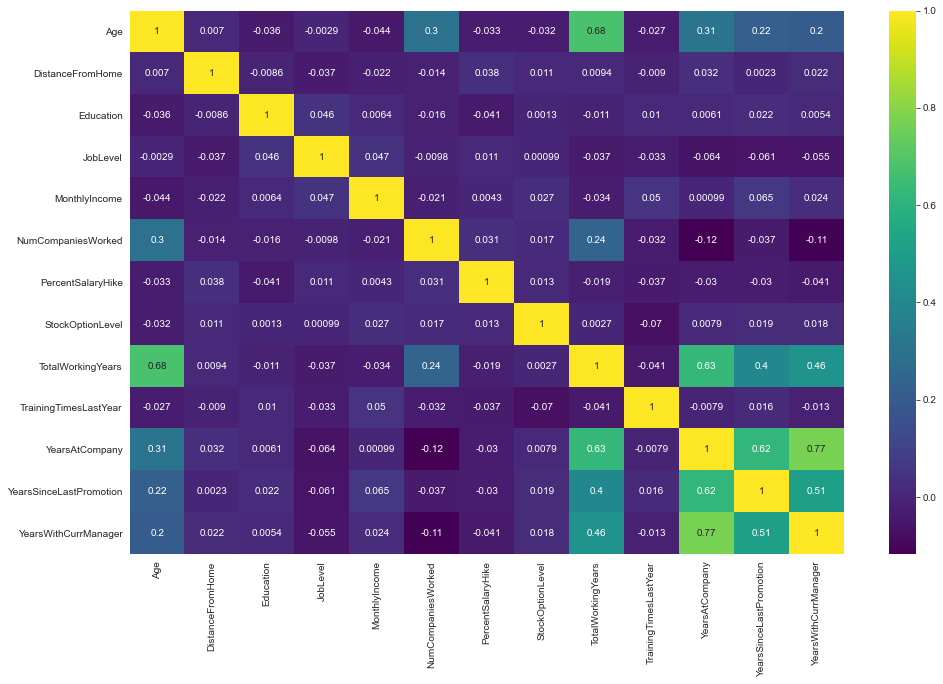

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(new_general_data.corr(),annot=True, cmap="viridis")

It seems we got some correlated values (We just mind 0.4 and high corr levels):<br>
Age - TotalWorkingYears<br>
YearsWithCurrManager - YearsAtCompany<br>
YearsWithCurrManager - TotalWorkingYears<br>
YearsSinceLastPromotion - YearsAtCompany<br>
YearsSinceLastPromotion - YearsWithCurrManager

Before plotting, Let's create categorizes and put the ages into them

In [14]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(new_general_data)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.000000,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.000000,3,5,1,4
2,2,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.000000,2,5,0,3
3,2,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.000000,5,8,7,5
4,2,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.000000,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,3,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.000000,5,3,0,2
4406,1,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.000000,2,3,0,2
4407,1,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.000000,4,4,1,2
4408,3,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.000000,2,9,7,8


Now, time to magic<br>
Let's plotting some core values with "Attrition" hue

Text(0.5, 1.0, 'Attrition Diversified By Age')

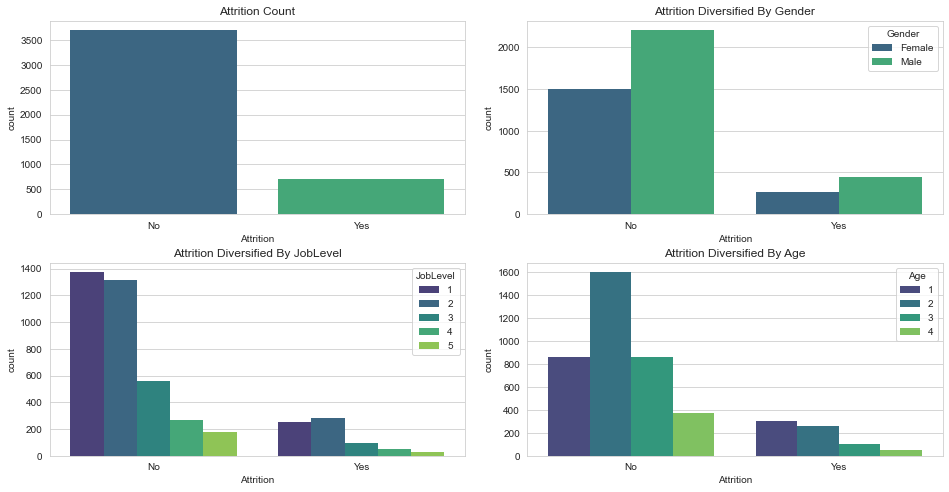

In [15]:
fig = plt.figure(figsize=(16,8))
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.15, hspace=0.25)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

color_palette = "viridis"

sns.countplot(ax=ax0, x='Attrition',palette=color_palette, data=new_general_data, lw=0)
sns.countplot(ax=ax1, x="Attrition",palette=color_palette, data=new_general_data, lw=0, hue="Gender")
sns.countplot(ax=ax2, x="Attrition",palette=color_palette, data=new_general_data, lw=0, hue="JobLevel")
sns.countplot(ax=ax3, x="Attrition",palette=color_palette, data=new_general_data, lw=0, hue="Age")

ax0.set_title("Attrition Count")
ax1.set_title("Attrition Diversified By Gender")
ax2.set_title("Attrition Diversified By JobLevel")
ax3.set_title("Attrition Diversified By Age")

Let's convert all the categorical data into numerical data

In [16]:
## new_general_data.dtypes
print(new_general_data['BusinessTravel'].unique())
print(new_general_data['EducationField'].unique())
print(new_general_data['Gender'].unique())
print(new_general_data['Department'].unique())
print(new_general_data['JobRole'].unique())
print(new_general_data['MaritalStatus'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Female' 'Male']
['Sales' 'Research & Development' 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']


In [17]:
labelEncoder_X = LabelEncoder()
new_general_data['BusinessTravel'] = labelEncoder_X.fit_transform(new_general_data['BusinessTravel'])
new_general_data['EducationField'] = labelEncoder_X.fit_transform(new_general_data['EducationField'])
new_general_data['Gender'] = labelEncoder_X.fit_transform(new_general_data['Gender'])
new_general_data['Department'] = labelEncoder_X.fit_transform(new_general_data['Department'])
new_general_data['JobRole'] = labelEncoder_X.fit_transform(new_general_data['JobRole'])
new_general_data['MaritalStatus'] = labelEncoder_X.fit_transform(new_general_data['MaritalStatus'])

In [18]:
label_encoder_y = LabelEncoder()
new_general_data['Attrition']=label_encoder_y.fit_transform(new_general_data['Attrition'])

In [19]:
new_general_data.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3


Now, we can take a look all values correlation levels

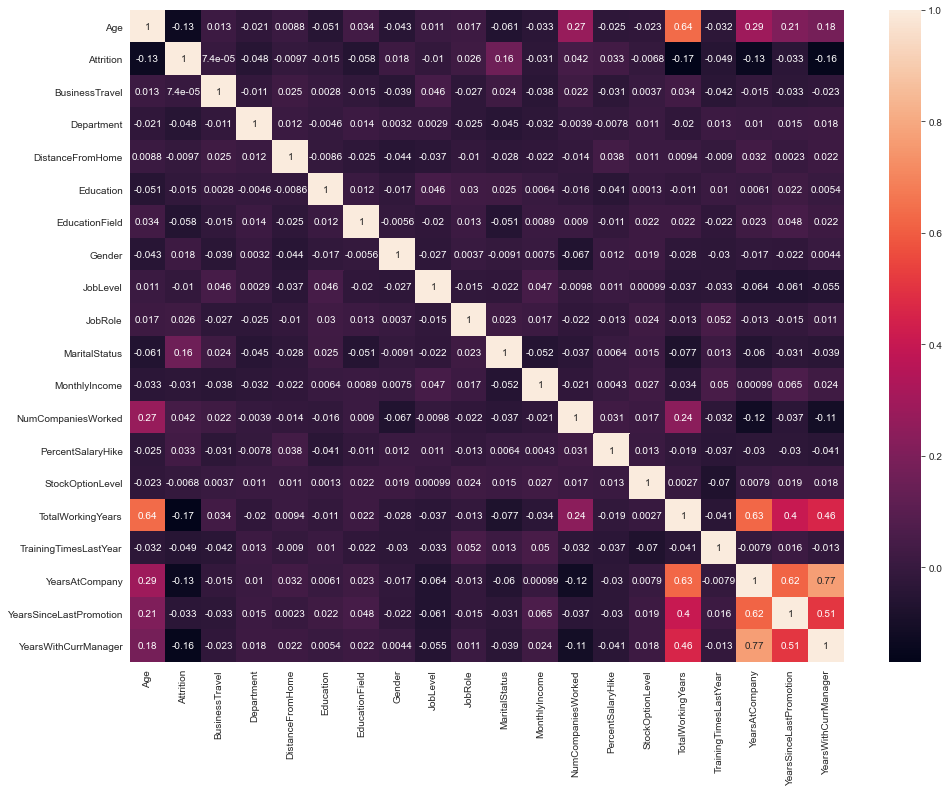

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(new_general_data.corr(), annot=True)

Ok, time to move on to modelling

In [21]:
x = new_general_data.drop('Attrition', axis = 1)
y = new_general_data['Attrition']

X_train,X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

In [22]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [23]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8356009070294784
[[730  11]
 [134   7]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       741
           1       0.39      0.05      0.09       141

    accuracy                           0.84       882
   macro avg       0.62      0.52      0.50       882
weighted avg       0.77      0.84      0.78       882

